In [20]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

In [8]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape dataset to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalize input data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [9]:
# Define the input shape
input_img = Input(shape=(28, 28, 1))

# Build the network
x = Conv2D(32, (3, 3), activation='relu')(input_img)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=input_img, outputs=output)


In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [11]:
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)


Epoch 1/10


2023-11-27 16:31:32.107369: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.8405 - loss: 0.5243 - val_accuracy: 0.9808 - val_loss: 0.0675
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9804 - loss: 0.0634 - val_accuracy: 0.9862 - val_loss: 0.0463
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9868 - loss: 0.0425 - val_accuracy: 0.9892 - val_loss: 0.0388
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9893 - loss: 0.0313 - val_accuracy: 0.9902 - val_loss: 0.0363
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9928 - loss: 0.0236 - val_accuracy: 0.9903 - val_loss: 0.0352
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9943 - loss: 0.0183 - val_accuracy: 0.9903 - val_loss: 0.0383
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9954 - loss: 0.0145 - val_accuracy: 0.9902 - val_loss: 0.0363
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9963 - loss: 0.0114 - val_accurac

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03544236719608307
Test accuracy: 0.9901000261306763


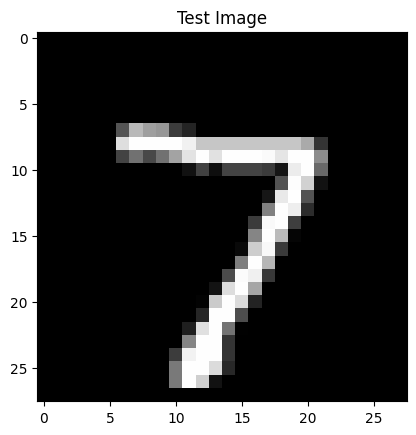

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Select a sample from the test set
test_image = x_test[0]
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title("Test Image")
plt.show()

# Expand dimensions to fit model input
test_image = np.expand_dims(test_image, axis=0)

In [14]:
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name] 
activation_model = Model(inputs=model.input, outputs=layer_outputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


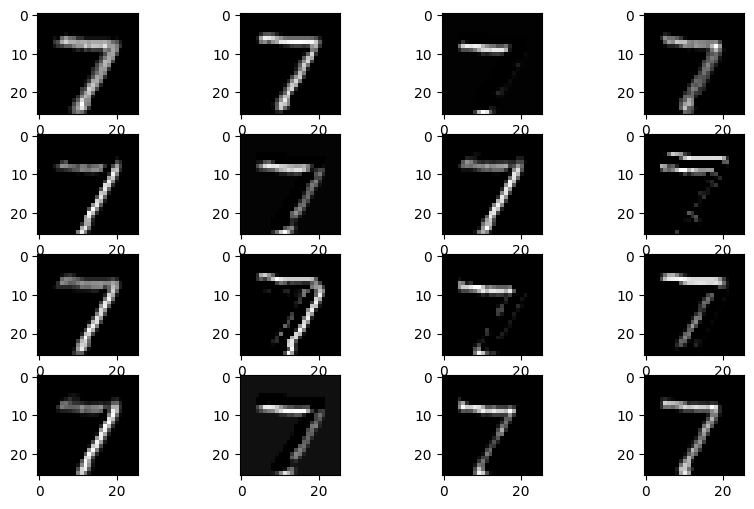

In [15]:
# Apply the model to the test image
activations = activation_model.predict(test_image)

# Function to plot feature maps
def display_activation(activations, col_size, row_size, layer_index):
    '''
    activations ... A list where each element contains the activation of a layer in the neural network.
    col_size ... The number of columns in the grid to display the feature maps.
    row_size ... The number of rows in the grid to display the feature maps.
    layer_index ... The index of the layer in activations whose feature maps you want to visualize.
    '''
    activation = activations[layer_index]
    activation_index=0
    '''
    Use Matplotlib to create a figure and a set of subplots.
    The number of subplots is determined by row_size and col_size, and the size of each subplot is scaled based on these values.
    '''
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    '''
    For each subplot, `imshow` is used to display an image. 
    In this case, the image is one of the activation maps from the specified layer. 
    The first index 0 of activation[0, :, :, activation_index] assumes 
    that you're dealing with a single input image (batch size of 1). 
    The rest of the indices :, :, activation_index are used to select the entire activation map.
    
    The colormap cmap='gray' is used to display the image in grayscale, 
    which is common for visualizing single-channel images like the MNIST dataset.
    
    After plotting each activation map, activation_index is incremented to move to the next map.
    '''
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

# Visualize feature maps after first ReLU
display_activation(activations, 4, 4, 0) # Change indices according to your model structure


In [24]:
activation_functions = ['relu', 'sigmoid', 'tanh', 'elu', 'selu', 'softmax']

In [25]:
def create_model_with_activation(activation):
    inputs = Input(shape=(28, 28, 1))
    x = Conv2D(32, kernel_size=(3, 3), activation=activation)(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation=activation)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation=activation)(x)
    x = Dropout(0.5)(x)
    outputs = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model


Epoch 1/5


2023-11-27 16:47:22.557493: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.7931 - loss: 0.6575 - val_accuracy: 0.9828 - val_loss: 0.0621
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9682 - loss: 0.1065 - val_accuracy: 0.9857 - val_loss: 0.0491
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9765 - loss: 0.0789 - val_accuracy: 0.9885 - val_loss: 0.0372
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9811 - loss: 0.0655 - val_accuracy: 0.9867 - val_loss: 0.0407
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9844 - loss: 0.0489 - val_accuracy: 0.9895 - val_loss: 0.0334
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


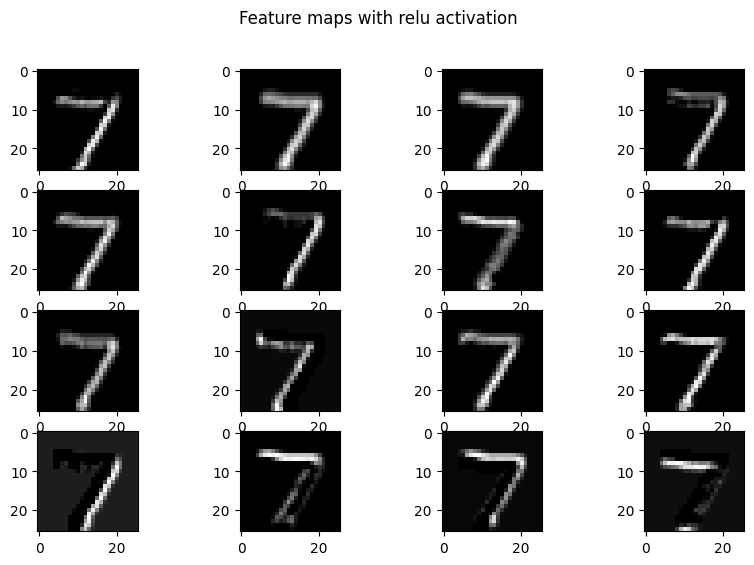

Epoch 1/5


2023-11-27 16:48:40.851614: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.1063 - loss: 2.3380 - val_accuracy: 0.1052 - val_loss: 2.2423
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.6670 - loss: 1.0155 - val_accuracy: 0.9592 - val_loss: 0.1490
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9319 - loss: 0.2315 - val_accuracy: 0.9723 - val_loss: 0.0949
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9538 - loss: 0.1567 - val_accuracy: 0.9770 - val_loss: 0.0725
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9638 - loss: 0.1214 - val_accuracy: 0.9795 - val_loss: 0.0633
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


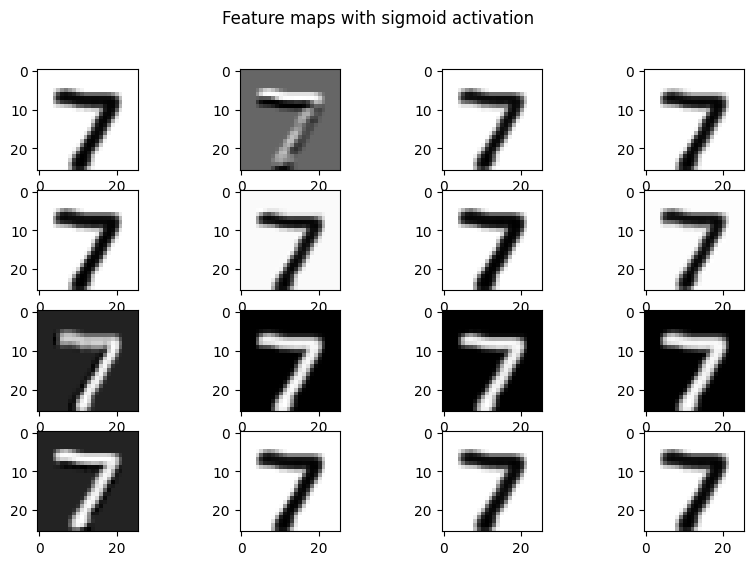

Epoch 1/5


2023-11-27 16:49:57.110035: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.8468 - loss: 0.5090 - val_accuracy: 0.9810 - val_loss: 0.0681
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9731 - loss: 0.0898 - val_accuracy: 0.9848 - val_loss: 0.0567
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9804 - loss: 0.0647 - val_accuracy: 0.9872 - val_loss: 0.0460
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9834 - loss: 0.0533 - val_accuracy: 0.9883 - val_loss: 0.0417
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9856 - loss: 0.0458 - val_accuracy: 0.9882 - val_loss: 0.0424
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


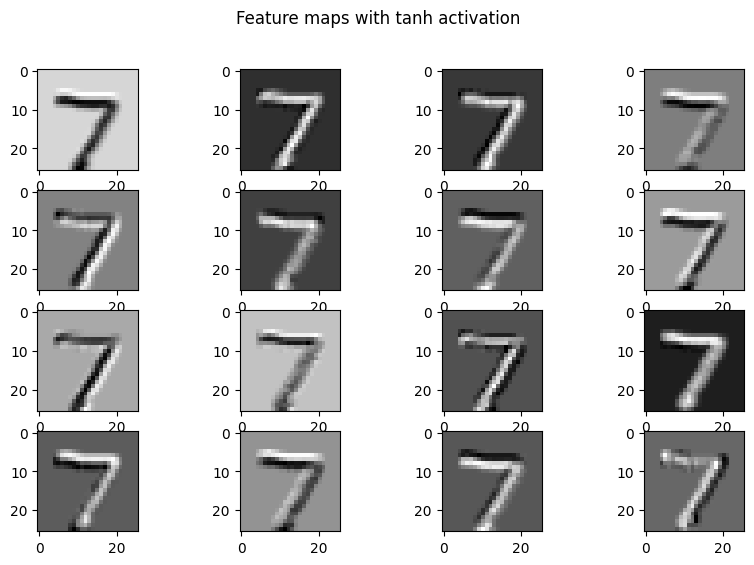

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8472 - loss: 0.5068 - val_accuracy: 0.9813 - val_loss: 0.0652
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9726 - loss: 0.0860 - val_accuracy: 0.9870 - val_loss: 0.0495
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9807 - loss: 0.0636 - val_accuracy: 0.9858 - val_loss: 0.0523
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9816 - loss: 0.0565 - val_accuracy: 0.9862 - val_loss: 0.0508
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9848 - loss: 0.0460 - val_accuracy: 0.9877 - val_loss: 0.0476
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


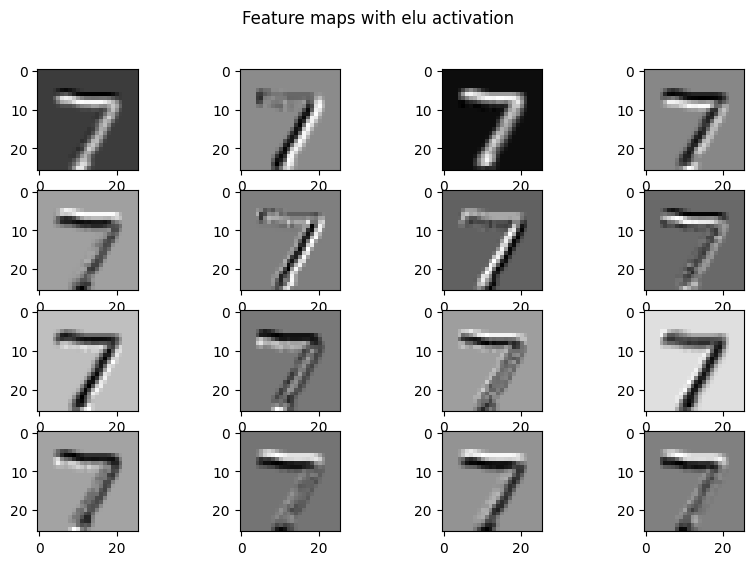

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.8498 - loss: 0.4827 - val_accuracy: 0.9818 - val_loss: 0.0669
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9720 - loss: 0.0920 - val_accuracy: 0.9840 - val_loss: 0.0589
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9779 - loss: 0.0742 - val_accuracy: 0.9840 - val_loss: 0.0573
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9816 - loss: 0.0596 - val_accuracy: 0.9877 - val_loss: 0.0515
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9842 - loss: 0.0499 - val_accuracy: 0.9860 - val_loss: 0.0499
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


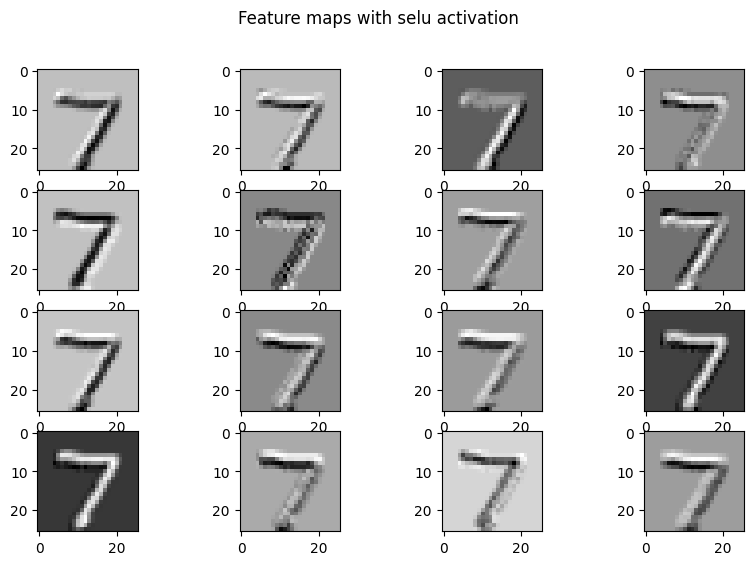

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.1092 - loss: 2.3020 - val_accuracy: 0.1050 - val_loss: 2.3003
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.2849 - loss: 2.0993 - val_accuracy: 0.7975 - val_loss: 1.4237
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.4810 - loss: 1.5218 - val_accuracy: 0.8973 - val_loss: 1.0646
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.5302 - loss: 1.3320 - val_accuracy: 0.9280 - val_loss: 0.8582
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.5389 - loss: 1.2370 - val_accuracy: 0.9468 - val_loss: 0.7222
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


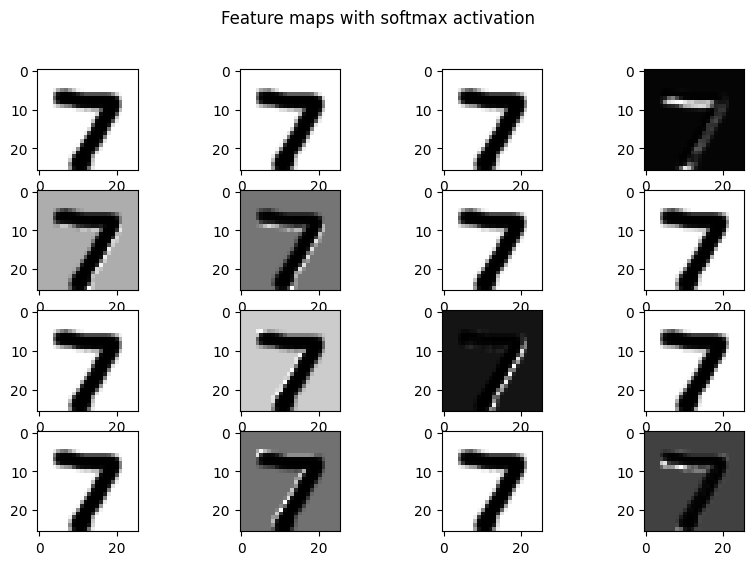

In [26]:
for activation in activation_functions:
    # Create model with the specified activation function
    model = create_model_with_activation(activation)
    
    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    # Train the model 
    model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1)
    
    # Perform a forward pass to initialize the model
    _ = model.predict(x_test[:1])

    # Fetch the layer outputs
    layer_outputs = [layer.output for layer in model.layers if isinstance(layer, Conv2D)]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    
    # Apply the model to the test image
    activations = activation_model.predict(test_image)
    
    # Visualize feature maps for the first layer
    display_activation(activations, 4, 4, 0) 
    
    plt.suptitle(f'Feature maps with {activation} activation')
    plt.show()

## Distinguishable observations and takeaways

### ReLU Activation (Rectified Linear Unit):
- Feature maps are **sparse**, with many areas of inactivity (black regions), which is characteristic of ReLU due to its property of outputting zero for any negative input.
- Edges and textures associated with the digit are highlighted, which shows that ReLU is effective in capturing these features.

### Sigmoid Activation:
- Feature maps show more **graded responses**, as the sigmoid function squashes the activations to a range between 0 and 1.
- This can lead to more diffuse edges and less sparsity compared to ReLU, which might be less effective for deeper networks due to the vanishing gradient problem.

### Tanh Activation (Hyperbolic Tangent):
- The tanh function outputs values in a range of [-1, 1], which is centered around zero, unlike sigmoid.
- Feature maps may show slightly more contrast than sigmoid because tanh has higher sensitivity for inputs that are not near the extremes of its range.

### ELU Activation (Exponential Linear Unit):
- ELU aims to combine the benefits of ReLU (non-saturation for positive inputs) with a smoother transition for negative inputs.
- Feature maps may show some activation where ReLU would show none, as ELU allows for small negative activations, potentially leading to more robust learning.

### SELU Activation (Scaled Exponential Linear Unit):
- SELU is designed to be **self-normalizing**, automatically scaling the activations to maintain a mean of zero and standard deviation of one.
- Feature maps show patterns similar to ELU but might have activations that are more evenly distributed due to the self-normalizing property.

From these experiments, one can infer that different activation functions can impact the kind of features learned by the convolutional layers. Activation functions like ReLU can be very effective in practice but may not capture as much detail for negative inputs, while ELU and SELU provide a balance by allowing some learning for negative inputs. Sigmoid and tanh might lead to more smooth feature maps but are less common in modern CNN architectures due to their tendency to produce vanishing gradients in deep networks.

The choice of activation function can thus significantly affect the training dynamics and performance of the network, and the optimal choice may depend on the specific task and the architecture of the network. These visualizations are a powerful tool for understanding these effects and can inform decisions when designing neural network architectures.
